# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2


print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data
import os


os.chdir(r'C:\Users\ADMIN\AL ML Coursesss\trip_records')

file_list = os.listdir()


df = pd.DataFrame()


for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name) 


        if file_name.endswith('.parquet'):
            sampled_data = pd.read_parquet(file_path, engine='pyarrow') 

 
            sampled_data = sampled_data.sample(frac=0.007, random_state=42)  


            df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")



After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv('data_New.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_csv('data_New.csv')

In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.90         1.0                  N           239           236   
1           1.86         1.0                  N           239           162   
2           0.50         1.0                  N           162           170   
3           2.56         1.0                  N           162           262   
4           2.80         1.0                  N           164           231   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         13.5    2.5      0.5        2.50           0.0   
1             1         14.2    0.0      0.5        3.64           0.0   
2             1          5.1    1.0      0.5        2.02           0.0   
3             1         17.0    2.5      0.5        4.70           0.0   
4             1         14.9    3.5      0.5        3.98           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.00                   2.5          0.0   
1                    1.0         21.84                   2.5          0.0   
2                    1.0         12.12                   2.5          0.0   
3                    1.0         28.20                   2.5          0.0   
4                    1.0         23.88                   2.5          0.0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265500 entries, 0 to 265499
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               265500 non-null  int64  
 1   tpep_pickup_datetime   265500 non-null  object 
 2   tpep_dropoff_datetime  265500 non-null  object 
 3   passenger_count        256470 non-null  float64
 4   trip_distance          265500 non-null  float64
 5   RatecodeID             256470 non-null  float64
 6   store_and_fwd_flag     256470 non-null  object 
 7   PULocationID           265500 non-null  int64  
 8   DOLocationID           265500 non-null  int64  
 9   payment_type           265500 non-null  int64  
 10  fare_amount            265500 non-null  float64
 11  extra                  265500 non-null  float64
 12  mta_tax                265500 non-null  float64
 13  tip_amount             265500 non-null  float64
 14  tolls_amount           265500 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
unnecessary_columns = [col for col in df.columns if "Unnamed" in col or "index" in col.lower()]
df = df.drop(columns=unnecessary_columns, errors='ignore')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns

if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:

    df['Combined_Airport_Fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
    

    df = df.drop(columns=['airport_fee', 'Airport_fee'])

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.90         1.0                  N           239           236   
1           1.86         1.0                  N           239           162   
2           0.50         1.0                  N           162           170   
3           2.56         1.0                  N           162           262   
4           2.80         1.0                  N           164           231   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         13.5    2.5      0.5        2.50           0.0   
1             1         14.2    0.0      0.5        3.64           0.0   
2             1          5.1    1.0      0.5        2.02           0.0   
3             1         17.0    2.5      0.5        4.70           0.0   
4             1         14.9    3.5      0.5        3.98           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         20.00                   2.5   
1                    1.0         21.84                   2.5   
2                    1.0         12.12                   2.5   
3                    1.0         28.20                   2.5   
4                    1.0         23.88                   2.5   

   Combined_Airport_Fee  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative

print(df["fare_amount"].min())

# No negative value


0.0


Did you notice something different in the `RatecodeID` column for above records?

Yes we have found 99 in the record

In [15]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].value_counts()


RatecodeID
1.0     241967
2.0      10228
5.0       1488
99.0      1452
3.0        829
4.0        506
Name: count, dtype: int64

In [16]:
# Find which columns have negative values
df = df[df["RatecodeID"] != 99.0]
print(df["RatecodeID"].value_counts())

RatecodeID
1.0    241967
2.0     10228
5.0      1488
3.0       829
4.0       506
Name: count, dtype: int64


In [17]:
df = df[df["RatecodeID"] != 99.0]
print(df["RatecodeID"].value_counts())

RatecodeID
1.0    241967
2.0     10228
5.0      1488
3.0       829
4.0       506
Name: count, dtype: int64


In [18]:
# fix these negative values
print(df.describe())

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  264048.000000    255018.000000  264048.000000  255018.000000   
mean        1.741608         1.374350       3.638318       1.075901   
std         0.442827         0.899321      80.015295       0.398203   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.780000       1.000000   
75%         2.000000         1.000000       3.380000       1.000000   
max         6.000000         8.000000   37523.740000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  264048.000000  264048.000000  264048.000000  264048.000000   
mean      165.313057     164.200104       1.165224      19.779402   
std        63.884569      69.654169       0.510045      18.308347   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

In [19]:
# fix these negative values
monetary_columns = ["extra", "mta_tax", "improvement_surcharge", 
                    "total_amount", "congestion_surcharge", "Combined_Airport_Fee"]

df[monetary_columns] = df[monetary_columns].abs()

print(df.describe())

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  264048.000000    255018.000000  264048.000000  255018.000000   
mean        1.741608         1.374350       3.638318       1.075901   
std         0.442827         0.899321      80.015295       0.398203   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.780000       1.000000   
75%         2.000000         1.000000       3.380000       1.000000   
max         6.000000         8.000000   37523.740000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  264048.000000  264048.000000  264048.000000  264048.000000   
mean      165.313057     164.200104       1.165224      19.779402   
std        63.884569      69.654169       0.510045      18.308347   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column
df.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          9030
trip_distance               0
RatecodeID               9030
store_and_fwd_flag       9030
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     9030
Combined_Airport_Fee        0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values

df[df['passenger_count'].isnull()]

# Impute NaN values in 'passenger_count'


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155            2  2023-01-20 15:15:17   2023-01-20 15:27:06              NaN   
157            2  2023-01-21 15:17:59   2023-01-21 15:39:36              NaN   
303            2  2023-01-28 23:58:47   2023-01-29 00:11:44              NaN   
309            1  2023-01-21 02:51:57   2023-01-21 03:15:22              NaN   
356            2  2023-01-17 21:22:28   2023-01-17 21:36:25              NaN   
...          ...                  ...                   ...              ...   
265403         1  2023-09-13 22:16:27   2023-09-13 22:29:21              NaN   
265421         1  2023-09-11 21:23:50   2023-09-11 21:35:41              NaN   
265445         2  2023-09-19 21:24:31   2023-09-19 21:41:47              NaN   
265448         1  2023-09-08 22:38:30   2023-09-08 22:50:37              NaN   
265477         2  2023-09-12 22:04:59   2023-09-12 22:21:59              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
155              1.35         NaN                NaN           142   
157              6.67         NaN                NaN           170   
303              1.73         NaN                NaN           211   
309              0.00         NaN                NaN            79   
356              2.43         NaN                NaN           143   
...               ...         ...                ...           ...   
265403           0.00         NaN                NaN           233   
265421           0.00         NaN                NaN           141   
265445           4.00         NaN                NaN           148   
265448           0.00         NaN                NaN           249   
265477           4.23         NaN                NaN           161   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
155              239             0        13.65    0.0      0.5        3.53   
157               41             0        27.71    0.0      0.5        7.34   
303                4             0        15.55    0.0      0.5        3.91   
309              166             0        22.83    0.0      0.5        0.00   
356              263             0        15.21    0.0      0.5        2.88   
...              ...           ...          ...    ...      ...         ...   
265403            90             0        17.11    0.0      0.5        0.00   
265421           107             0        17.50    0.0      0.5        0.00   
265445           181             0        21.23    0.0      0.5        5.05   
265448           164             0        42.92    0.0      0.5        0.00   
265477            74             0        23.54    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
155              0.0                    1.0         21.18   
157              0.0                    1.0         39.05   
303              0.0                    1.0         23.46   
309              0.0                    1.0         26.83   
356              0.0                    1.0         22.09   
...              ...                    ...           ...   
265403           0.0                    1.0         21.11   
265421           0.0                    1.0         21.50   
265445           0.0                    1.0         30.28   
265448           0.0                    1.0         46.92   
265477           0.0                    1.0         27.54   

        congestion_surcharge  Combined_Airport_Fee  
155                      NaN                   0.0  
157                      NaN                   0.0  
303                      NaN                   0.0  
309                      NaN                   0.0  
356                      NaN                   0.0  
...                      ...                   ...  
265403                   NaN                   0.0  
265421                   NaN                   0.0  
265445                   NaN                   

In [22]:
# Impute NaN values in 'passenger_count'

df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median())
df['passenger_count'].isnull().value_counts()

passenger_count
False    264048
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

Yes first i could zero value in Passenger_count now i have removed it.

In [23]:
df['passenger_count'].value_counts()

df = df[df["passenger_count"] > 0]

df['passenger_count'].value_counts()

passenger_count
1.0    200322
2.0     38901
3.0      9625
4.0      5426
5.0      3459
6.0      2250
8.0         2
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isnull().value_counts()

df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].median())

df['RatecodeID'].isnull().value_counts()

RatecodeID
False    259985
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge

df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].median())
df['congestion_surcharge'].isnull().value_counts()


congestion_surcharge
False    259985
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9030
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Combined_Airport_Fee        0
dtype: int64

In [27]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna('N')
df['store_and_fwd_flag'].isnull().value_counts()

store_and_fwd_flag
False    259985
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [28]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

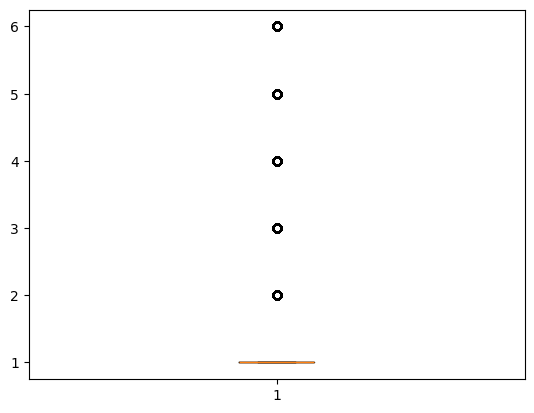

In [29]:
# remove passenger_count > 6

df = df[df["passenger_count"] <= 7]

plt.boxplot(df['passenger_count'])
plt.show()


In [30]:
# Continue with outlier handling
#Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300

filtered_df = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print(filtered_df)

df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]

filtered_df = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print(filtered_df)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47758          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
109684         2  2023-03-19 23:12:29   2023-03-19 23:12:35              1.0   
210866         2  2023-05-16 19:12:48   2023-05-16 19:12:51              1.0   
226046         2  2023-07-24 21:43:56   2023-07-24 21:57:57              1.0   
235276         1  2023-07-20 16:17:03   2023-07-20 16:17:23              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
47758             0.0         5.0                  N           265   
109684            0.0         5.0                  N           265   
210866            0.0         5.0                  N           265   
226046            0.0         5.0                  N           265   
235276            0.0         5.0                  N           193   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
47758            26

In [31]:
#Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones

filtered_df1 = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] < 0.01)]
print(filtered_df1)

df=  df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] < 0.01))]

filtered_df1 = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] < 0.01)]
print(filtered_df1)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3835           1  2023-01-24 18:31:57   2023-01-24 18:33:16              2.0   
6585           2  2023-01-13 06:19:23   2023-01-13 06:19:27              1.0   
9570           2  2023-01-14 12:03:42   2023-01-14 12:03:49              2.0   
9649           1  2023-01-29 09:52:41   2023-01-29 09:53:54              1.0   
11054          2  2023-01-19 13:28:25   2023-01-19 13:28:51              1.0   
15245          2  2023-01-12 12:34:27   2023-01-12 12:35:28              1.0   
19126          1  2023-01-04 13:09:40   2023-01-04 13:09:56              1.0   
23206          1  2023-10-26 17:20:38   2023-10-26 17:21:18              3.0   
23897          2  2023-10-07 11:51:21   2023-10-07 11:51:30              2.0   
31754          2  2023-10-19 12:31:08   2023-10-19 12:31:24              1.0   
37179          2  2023-10-01 15:43:56   2023-10-01 15:45:51              1.0   
57266          2  2023-11-18 23:45:16   

In [32]:
 #Entries where `trip_distance` is more than 250  miles.

plt.boxplot(df['trip_distance'])
plt.show()

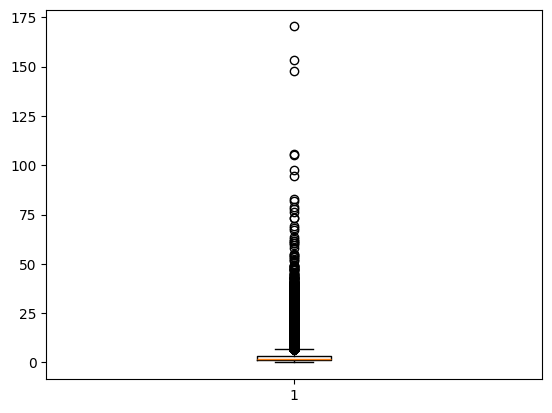

In [33]:
df = df[~(df["trip_distance"] > 250)]

plt.boxplot(df['trip_distance'])
plt.show()

In [34]:
#Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary

df['payment_type'].value_counts()


payment_type
1    204312
2     43539
0      9028
4      1930
3      1126
Name: count, dtype: int64

In [35]:
#Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary

df = df[df["payment_type"] != 0]

df['payment_type'].value_counts()

payment_type
1    204312
2     43539
4      1930
3      1126
Name: count, dtype: int64

In [36]:
# Do any columns need standardising?

print(df.describe())


            VendorID  passenger_count  trip_distance     RatecodeID  \
count  250907.000000    250907.000000  250907.000000  250907.000000   
mean        1.757583         1.396569       3.444610       1.075733   
std         0.428546         0.889117       4.586306       0.396638   
min         1.000000         1.000000       0.000000       1.000000   
25%         2.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.780000       1.000000   
75%         2.000000         1.000000       3.350000       1.000000   
max         2.000000         6.000000     170.300000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  250907.000000  250907.000000  250907.000000  250907.000000   
mean      165.403125     164.414807       1.205578      19.721341   
std        63.575002      69.610189       0.467381      18.367818   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [37]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Combined_Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical..
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

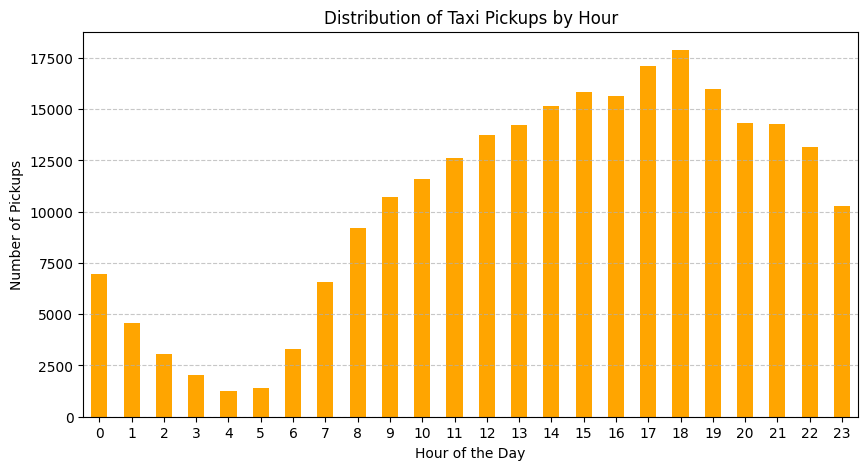

In [38]:
# Find and show the hourly trends in taxi pickups

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])


df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

plt.figure(figsize=(10, 5))
df["pickup_hour"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Distribution of Taxi Pickups by Hour")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


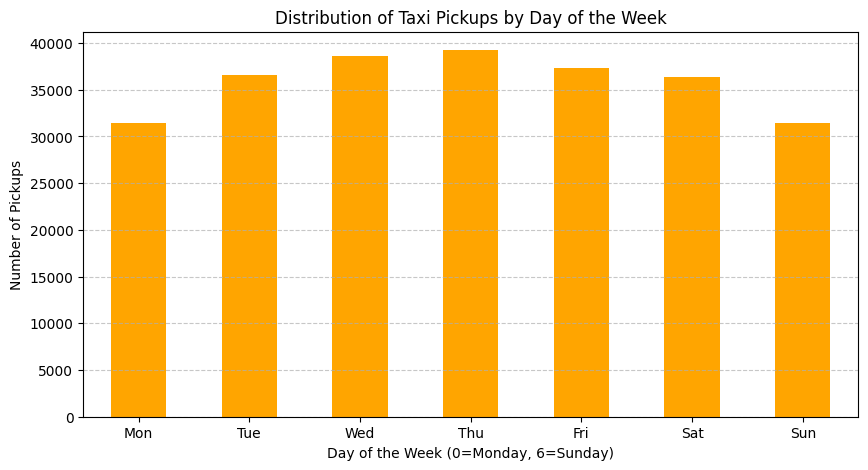

In [39]:
# Find and show the daily trends in taxi pickups (days of the week)

df["pickup_day"] = df["tpep_pickup_datetime"].dt.dayofweek
plt.figure(figsize=(10, 5))
df["pickup_day"].value_counts().sort_index().plot(kind="bar",color="orange")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Pickups")
plt.title("Distribution of Taxi Pickups by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


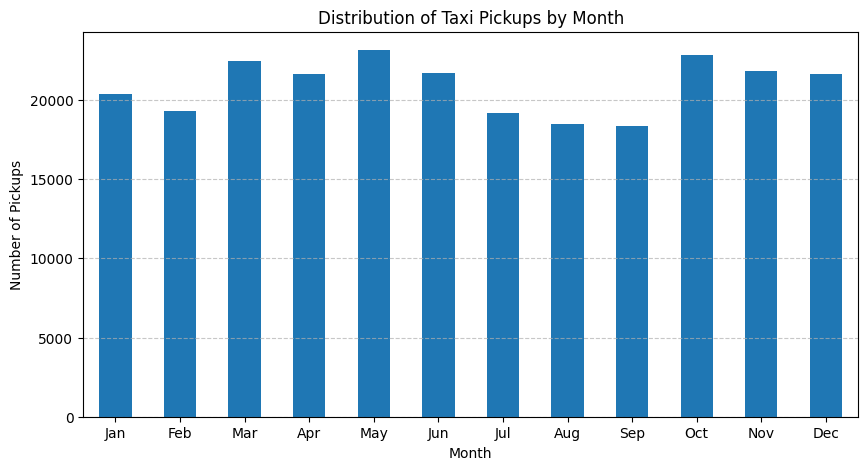

In [40]:
# Show the monthly trends in pickups


df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])


df["pickup_month"] = df["tpep_pickup_datetime"].dt.month


month_order = list(range(1, 13))


plt.figure(figsize=(10, 5))
df["pickup_month"].value_counts().reindex(month_order).plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Distribution of Taxi Pickups by Month")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [41]:
# Analyse the above parameters

(df['fare_amount'] < 0.01).value_counts()

fare_amount
False    250879
True         28
Name: count, dtype: int64

In [42]:
df = df[df['fare_amount'] != 0]
(df['fare_amount'] < 0.01).value_counts()

fare_amount
False    250879
Name: count, dtype: int64

In [43]:
(df['total_amount'] < 0.01).value_counts()

total_amount
False    250879
Name: count, dtype: int64

In [44]:
(df['trip_distance'] < 0.01).value_counts()

trip_distance
False    248098
True       2781
Name: count, dtype: int64

In [45]:
df = df[df['trip_distance'] != 0]
(df['trip_distance'] < 0.01).value_counts()

trip_distance
False    248098
Name: count, dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes removed the Zero values from fare_amount, total_amount, and also trip_distance  (Top_Amount not removed as it is optional amount from the customer it can be zero too)

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [46]:
df["PU_DO_Diff"] = df["PULocationID"] - df["DOLocationID"]


pu_do_diff_counts = df["PU_DO_Diff"].value_counts().reset_index()
pu_do_diff_counts.columns = ["PU_DO_Diff", "count"]


zero_diff_counts = pu_do_diff_counts[pu_do_diff_counts["PU_DO_Diff"] == 0]

print(zero_diff_counts)


   PU_DO_Diff  count
0           0  11634


In [47]:
# Create a df with non zero entries for the selected parameters.
df = df[df["PU_DO_Diff"] != 0]

pu_do_diff_counts = df["PU_DO_Diff"].value_counts().reset_index()
pu_do_diff_counts.columns = ["PU_DO_Diff", "count"]


zero_diff_counts = pu_do_diff_counts[pu_do_diff_counts["PU_DO_Diff"] == 0]
print(zero_diff_counts)

columns_to_remove = ["pickup_hour", "pickup_day", "pickup_month", "PU_DO_Diff"]



Empty DataFrame
Columns: [PU_DO_Diff, count]
Index: []


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [48]:
# Group data by month and analyse monthly revenue

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['Year-Month'] = df['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = df.groupby('Year-Month')['total_amount'].sum().reset_index()

monthly_revenue['Year-Month'] = monthly_revenue['Year-Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Year-Month'], monthly_revenue['total_amount'], marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

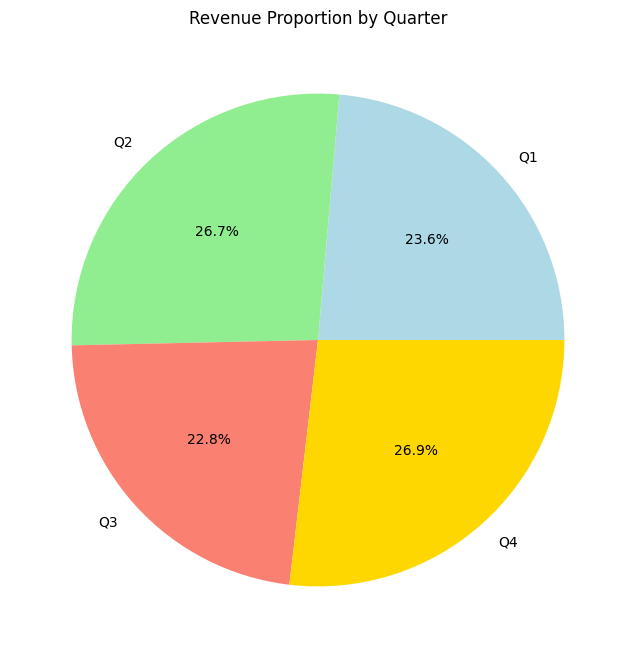

In [49]:
# Calculate proportion of each quarter

df["pickup_quarter"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.quarter

quarterly_revenue = df.groupby("pickup_quarter")["total_amount"].sum()
proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(proportion, labels=["Q1", "Q2", "Q3", "Q4"], autopct='%1.1f%%', colors=["lightblue", "lightgreen", "salmon", "gold"])
plt.title("Revenue Proportion by Quarter")
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [50]:
df = df[df["fare_amount"] <= 700]

Correlation between trip distance and fare amount: 0.96


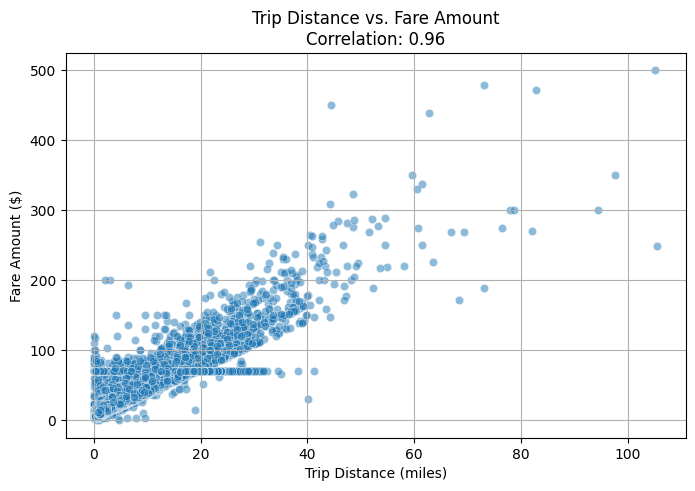

In [51]:
# Show how trip fare is affected by distance


df_filtered = df[df["trip_distance"] > 0]

correlation_value = df_filtered["trip_distance"].corr(df_filtered["fare_amount"])
print(f"Correlation between trip distance and fare amount: {correlation_value:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["trip_distance"], y=df_filtered["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Distance vs. Fare Amount\nCorrelation: {correlation_value:.2f}")
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [52]:
# Show relationship between fare and trip duration
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])


df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60


df_filtered = df[df["trip_duration"] > 0]


correlation_value = df_filtered["fare_amount"].corr(df_filtered["trip_duration"])
print(f"Correlation between fare amount and trip duration: {correlation_value:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["trip_duration"], y=df_filtered["fare_amount"], alpha=0.5)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Duration vs. Fare Amount\nCorrelation: {correlation_value:.2f}")
plt.grid(True)
plt.show()




Correlation between fare amount and trip duration: 0.28


In [53]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["passenger_count"], y=df_filtered["fare_amount"], color='red')  # Corrected spelling
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution for Different Passenger Counts")
plt.grid(True)
plt.show()


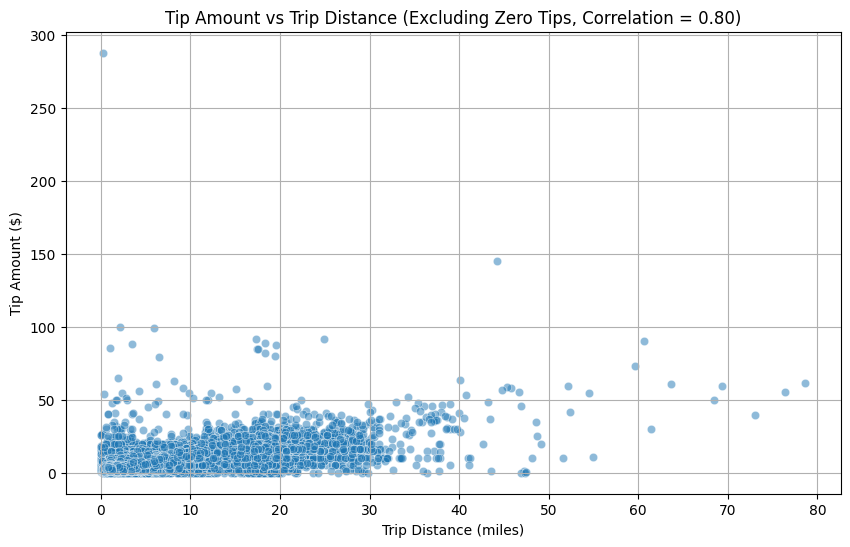

In [54]:
# Show relationship between tip and trip distance


filtered_df = df[df['tip_amount'] > 0]


correlation_value = filtered_df['tip_amount'].corr(filtered_df['trip_distance'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_distance'], y=filtered_df['tip_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title(f"Tip Amount vs Trip Distance (Excluding Zero Tips, Correlation = {correlation_value:.2f})")
plt.grid(True)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

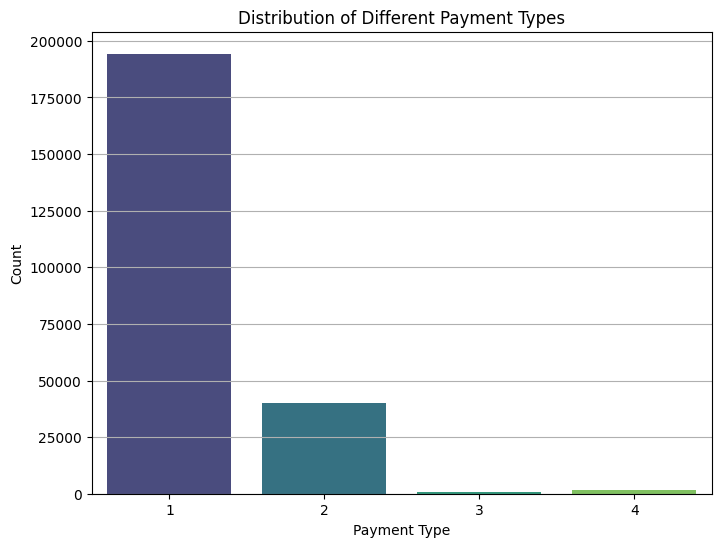

In [55]:
# Analyse the distribution of different payment types (payment_type).

payment_distribution = df['payment_type'].value_counts().reset_index()
payment_distribution.columns = ['Payment Type', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution['Payment Type'], y=payment_distribution['Count'], palette='viridis')

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Different Payment Types")
plt.grid(axis='y')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [56]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [57]:
# import geopandas as gpd
import geopandas as gpd

shapefile_path = r"C:\Users\ADMIN\AL ML Coursesss\taxi_zones\taxi_zones.shp"

zones = gpd.read_file(shapefile_path)

zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

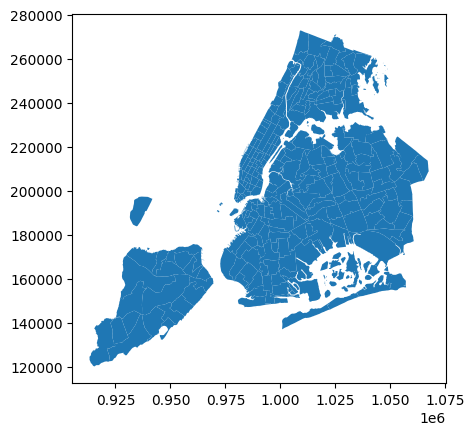

In [58]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236463 entries, 0 to 265499
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               236463 non-null  int64         
 1   tpep_pickup_datetime   236463 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  236463 non-null  datetime64[ns]
 3   passenger_count        236463 non-null  float64       
 4   trip_distance          236463 non-null  float64       
 5   RatecodeID             236463 non-null  float64       
 6   store_and_fwd_flag     236463 non-null  object        
 7   PULocationID           236463 non-null  int64         
 8   DOLocationID           236463 non-null  int64         
 9   payment_type           236463 non-null  int64         
 10  fare_amount            236463 non-null  float64       
 11  extra                  236463 non-null  float64       
 12  mta_tax                236463 non-null  float64  

In [60]:
#") Merge zones and trip records using locationID and PULocationID

zones["LocationID"] = zones["LocationID"].astype(int)
df["PULocationID"] = df["PULocationID"].astype(int)

merged_df = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

print(merged_df)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1              2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2              2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3              2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4              1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
...          ...                  ...                   ...              ...   
236465         1  2023-09-25 23:11:46   2023-09-25 23:19:38              1.0   
236466         2  2023-09-11 07:42:12   2023-09-11 07:49:04              1.0   
236467         2  2023-09-20 19:10:57   2023-09-20 19:38:54              1.0   
236468         1  2023-09-30 13:48:26   2023-09-30 14:03:59              1.0   
236469         2  2023-09-11 18:13:38   2023-09-11 18:27:04              1.0   

        trip_distance  RatecodeID store

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [61]:
# Group data by location and calculate the number of trips

trip_counts_by_location = merged_df.groupby("zone").size().reset_index(name="Number of Trips")

print(trip_counts_by_location)


                          zone  Number of Trips
0                Alphabet City              237
1                      Astoria               80
2                 Baisley Park               71
3                   Bath Beach                2
4                 Battery Park              118
..                         ...              ...
183  Williamsburg (South Side)               39
184                   Woodside               31
185         World Trade Center             1249
186             Yorkville East             3137
187             Yorkville West             4543

[188 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60

df_filtered = df[df["trip_duration"] > 0]

correlation_far_duration = df['fare_amount'].corr(df['trip_duration'])
correlation_far_passenger=df ['fare_amount'].corr(df['passenger_count'])

print(f"correlation_far_duration:{correlation_far_duration}")
print(f"correlation_far_passenger:{correlation_far_pass}")


In [64]:
# Function to safely convert WKT strings to Shapely geometries
def convert_geometry(geom):
    if isinstance(geom, str):  # Convert only if it's a string (WKT format)
        return wkt.loads(geom)
    return geom  # Keep existing Polygon/MultiPolygon objects unchanged


zones['geometry'] = zones['geometry'].apply(convert_geometry)

geometry_types = zones['geometry'].apply(lambda x: x.geom_type if x else "Invalid").value_counts()
geometry_types


geometry
Polygon         240
MultiPolygon     23
Name: count, dtype: int64

In [65]:
from shapely.geometry import Polygon, MultiPolygon


def convert_to_polygon(geom):
    if isinstance(geom, MultiPolygon):
        return max(geom.geoms, key=lambda g: g.area)  # Keep the largest polygon
    return geom  # Keep existing Polygons unchanged


zones['geometry'] = zones['geometry'].apply(convert_to_polygon)


zones = zones.dropna(subset=['geometry'])


gdf = gpd.GeoDataFrame(zones, geometry='geometry', crs="EPSG:4326")


geometry_types_after = gdf['geometry'].apply(lambda x: x.geom_type if x else "Invalid").value_counts()
geometry_types_after


geometry
Polygon    263
Name: count, dtype: int64

In [66]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(zones, geometry='geometry', crs="EPSG:4326")


gdf = gdf.merge(trip_counts_by_location, on="zone", how="left")

gdf["Number of Trips"] = gdf["Number of Trips"].fillna(0)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

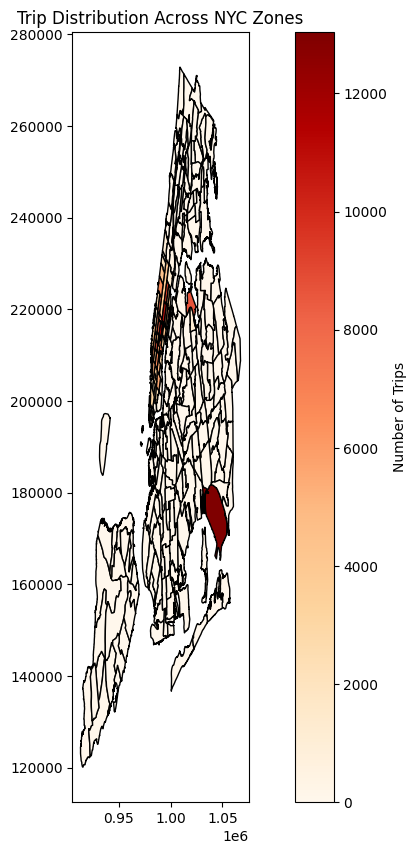

In [67]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))



gdf.plot(column="Number of Trips", ax=ax, legend=True, cmap="OrRd",
         legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
         edgecolor="black")

ax.set_title("Trip Distribution Across NYC Zones")
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

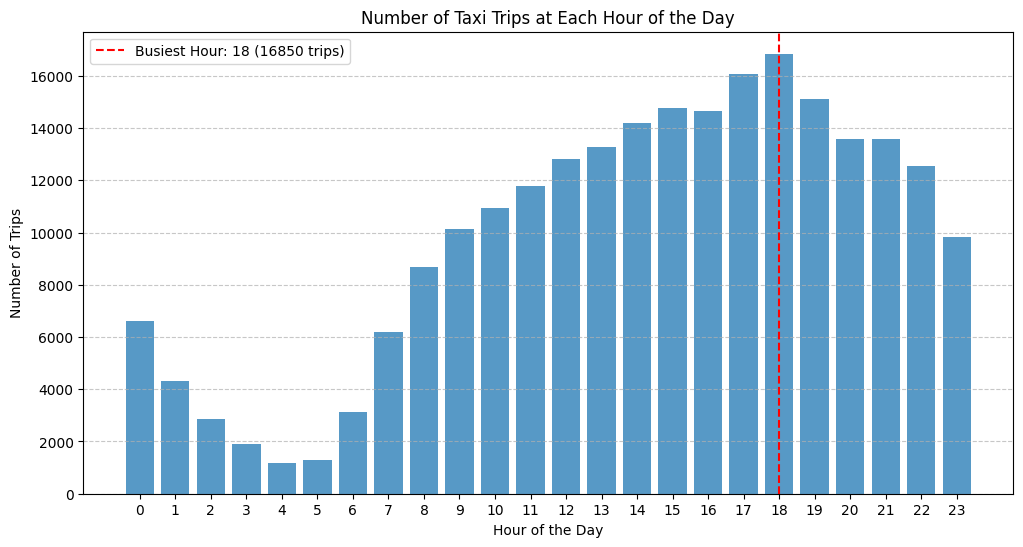

In [68]:
# Visualise the number of trips per hour and find the busiest hour

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])


df["hour_of_day"] = df["tpep_pickup_datetime"].dt.hour


trips_per_hour = df.groupby("hour_of_day").size().reset_index(name="Total_Trips")


busiest_hour = trips_per_hour.loc[trips_per_hour["Total_Trips"].idxmax()]


plt.figure(figsize=(12, 6))
plt.bar(trips_per_hour["hour_of_day"], trips_per_hour["Total_Trips"], alpha=0.75)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips at Each Hour of the Day")
plt.xticks(range(24))  
plt.grid(axis="y", linestyle="--", alpha=0.7)


busiest_hour_value = busiest_hour["hour_of_day"]
busiest_hour_trips = busiest_hour["Total_Trips"]
plt.axvline(busiest_hour_value, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour_value} ({busiest_hour_trips} trips)")
plt.legend()

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [76]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [70]:
# Compare traffic trends for the week days and weekends


df["day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek


df["day_type"] = df["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")


traffic_trends = df.groupby(["day_type", "hour_of_day"]).size().reset_index(name="Total_Trips")


plt.figure(figsize=(12, 6))


weekday_trends = traffic_trends[traffic_trends["day_type"] == "Weekday"]
plt.plot(weekday_trends["hour_of_day"], weekday_trends["Total_Trips"], marker='o', label="Weekdays")


weekend_trends = traffic_trends[traffic_trends["day_type"] == "Weekend"]
plt.plot(weekend_trends["hour_of_day"], weekend_trends["Total_Trips"], marker='o', linestyle="--", label="Weekends")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Comparison of Traffic Trends: Weekdays vs Weekends")
plt.xticks(range(24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [77]:
# Find top 10 pickup and dropoff zones

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']

location_ratios = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)


location_ratios['Pickup_Dropoff_Ratio'] = location_ratios['Pickup_Count'] / (location_ratios['Dropoff_Count'] + 1e-9)

top_10_ratios = location_ratios.nlargest(10, 'Pickup_Dropoff_Ratio')
bottom_10_ratios = location_ratios.nsmallest(10, 'Pickup_Dropoff_Ratio')

top_10_ratios, bottom_10_ratios



(     LocationID  Pickup_Count  Dropoff_Count  Pickup_Dropoff_Ratio
 56           59           1.0            0.0          1.000000e+09
 67           70        1173.0          126.0          9.309524e+00
 124         132       13039.0         2422.0          5.383567e+00
 130         138        8694.0         2928.0          2.969262e+00
 178         186        8634.0         5505.0          1.568392e+00
 40           43        4107.0         2868.0          1.432008e+00
 106         114        3270.0         2382.0          1.372796e+00
 240         249        5394.0         3943.0          1.367994e+00
 154         162        8748.0         6819.0          1.282886e+00
 153         161       11366.0         9455.0          1.202115e+00,
     LocationID  Pickup_Count  Dropoff_Count  Pickup_Dropoff_Ratio
 1            3           0.0           19.0                   0.0
 3            6           0.0            7.0                   0.0
 5            8           0.0            6.0      

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [79]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


pickup_dropoff_counts = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='Count')


pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'Total_Pickups']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['DOLocationID', 'Total_Dropoffs']


pickup_dropoff_ratios = pickup_dropoff_counts.merge(pickup_counts, on='PULocationID')
pickup_dropoff_ratios = pickup_dropoff_ratios.merge(dropoff_counts, on='DOLocationID')


pickup_dropoff_ratios['Pickup_Dropoff_Ratio'] = pickup_dropoff_ratios['Total_Pickups'] / (pickup_dropoff_ratios['Total_Dropoffs'] + 1e-9)


top_10_ratios = pickup_dropoff_ratios.nlargest(10, 'Pickup_Dropoff_Ratio')
bottom_10_ratios = pickup_dropoff_ratios.nsmallest(10, 'Pickup_Dropoff_Ratio')

top_10_ratios, bottom_10_ratios



(      PULocationID  DOLocationID  Count  Total_Pickups  Total_Dropoffs  \
 2977           132            44      1          13039               1   
 3104           132           187      1          13039               1   
 3120           132           204      1          13039               1   
 3539           138           253      1           8694               1   
 2990           132            57      1          13039               2   
 3093           132           176      1          13039               2   
 3101           132           184      1          13039               2   
 3366           138            57      1           8694               2   
 3414           138           115      1           8694               2   
 2956           132            23      3          13039               3   
 
       Pickup_Dropoff_Ratio  
 2977          13038.999987  
 3104          13038.999987  
 3120          13038.999987  
 3539           8693.999991  
 2990           6519.49

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

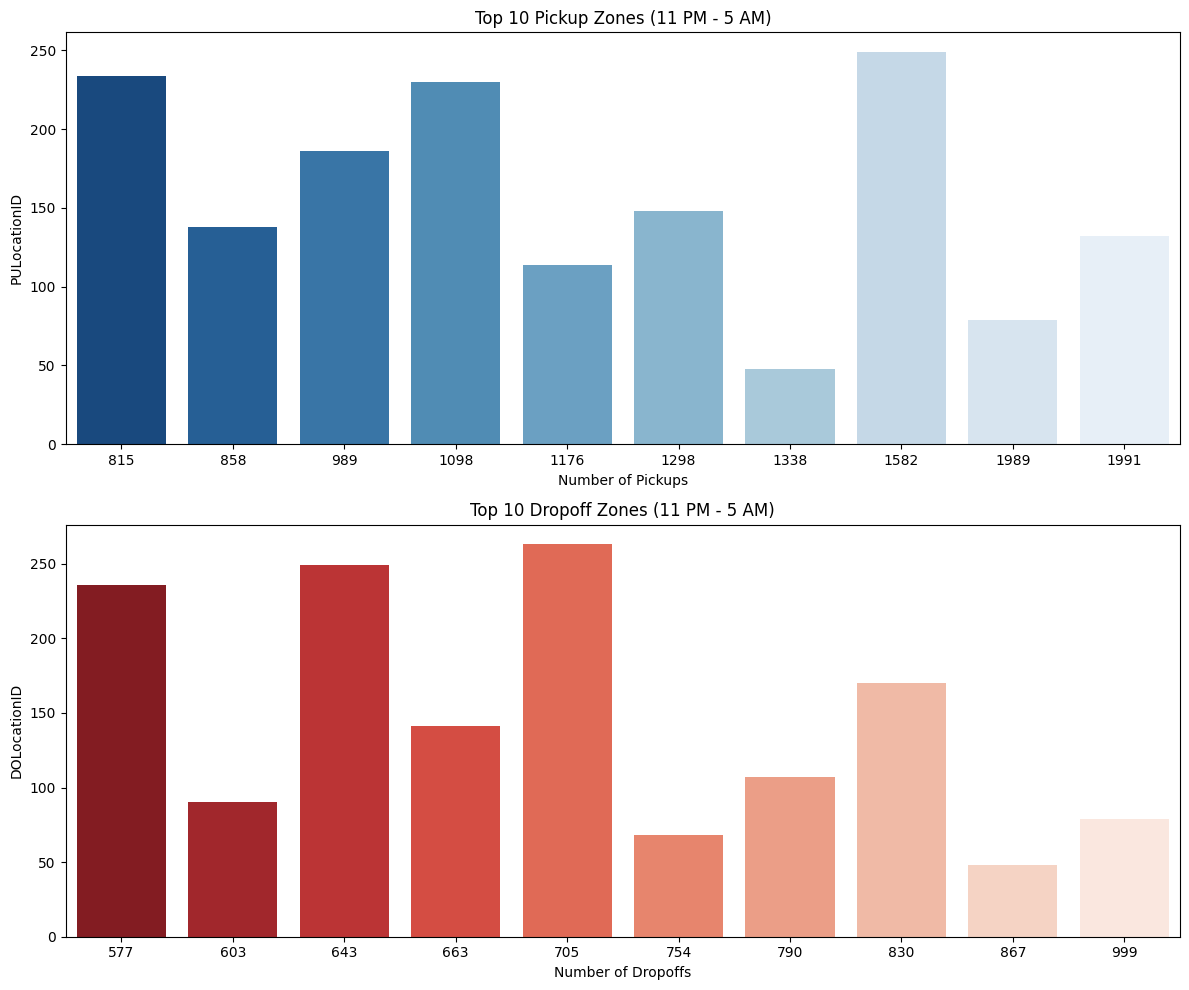

In [81]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

night_hours_data = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]


top_night_pickup_zones = night_hours_data['PULocationID'].value_counts().head(10).reset_index()
top_night_pickup_zones.columns = ['PULocationID', 'Pickup_Count']


top_night_dropoff_zones = night_hours_data['DOLocationID'].value_counts().head(10).reset_index()
top_night_dropoff_zones.columns = ['DOLocationID', 'Dropoff_Count']

top_night_pickup_zones, top_night_dropoff_zones


fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(x='Pickup_Count', y='PULocationID', data=top_night_pickup_zones, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Pickup Zones (11 PM - 5 AM)')
axes[0].set_xlabel('Number of Pickups')
axes[0].set_ylabel('PULocationID')


sns.barplot(x='Dropoff_Count', y='DOLocationID', data=top_night_dropoff_zones, ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 10 Dropoff Zones (11 PM - 5 AM)')
axes[1].set_xlabel('Number of Dropoffs')
axes[1].set_ylabel('DOLocationID')

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [82]:
# Filter for night hours (11 PM to 5 AM)

night_hours_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
20         2  2023-01-04 01:07:43   2023-01-04 01:27:24              1.0   
41         2  2023-01-28 00:11:13   2023-01-28 00:35:17              1.0   
54         1  2023-01-25 23:04:10   2023-01-25 23:37:00              2.0   
60         2  2023-01-22 04:14:54   2023-01-22 04:29:23              1.0   
67         2  2023-01-30 01:30:07   2023-01-30 02:01:47              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
20          14.90         1.0                  N           132           192   
41           5.44         1.0                  N            50           232   
54           8.90         1.0                  N           230           106   
60           3.19         1.0                  N           232            25   
67          16.02         1.0                  N            68           122   

    payment_type  ...  pickup_hour  pickup_day  pickup_month  PU_DO_Diff  \
20             1  ...            1           2             1         -60   
41             1  ...            0           5             1        -182   
54             1  ...           23           2             1         124   
60             2  ...            4           6             1         207   
67             2  ...            1           0             1         -54   

    Year-Month  pickup_quarter  trip_duration  hour_of_day  day_of_week  \
20     2023-01               1      19.683333            1            2   
41     2023-01               1      24.066667            0            5   
54     2023-01               1      32.833333           23            2   
60     2023-01               1      14.483333            4            6   
67     2023-01               1      31.666667            1            0   

    day_type  
20   Weekday  
41   Weekend  
54   Weekday  
60   Weekend  
67   Weekday  

[5 rows x 29 columns]

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

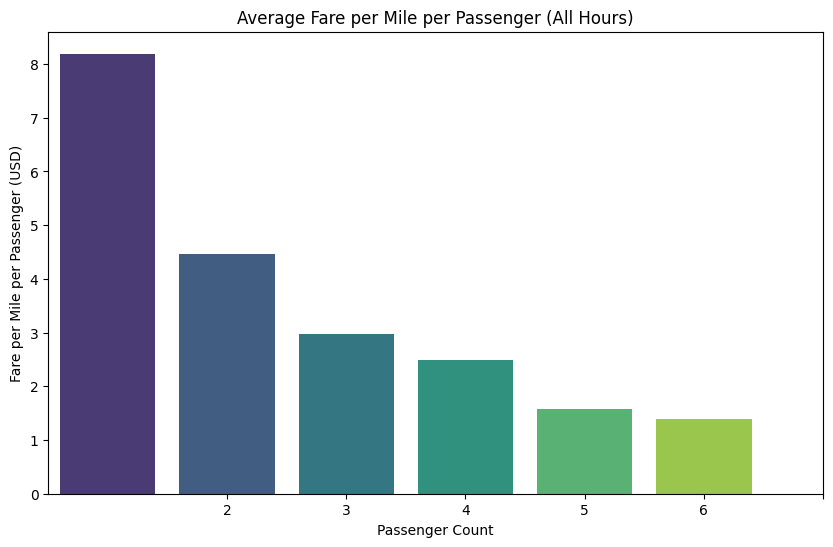

In [94]:
# Analyse the fare per mile per passenger for different passenger counts


df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)]


df['fare_per_mile_per_passenger'] = df['fare_amount'] / (df['trip_distance'] * df['passenger_count'])


avg_fare_per_mile_per_passenger['passenger_count'] = avg_fare_per_mile_per_passenger['passenger_count'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare_per_mile_per_passenger, palette='viridis')

plt.title('Average Fare per Mile per Passenger (All Hours)')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.xticks(ticks=range(1, avg_fare_per_mile_per_passenger['passenger_count'].max() + 1))
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

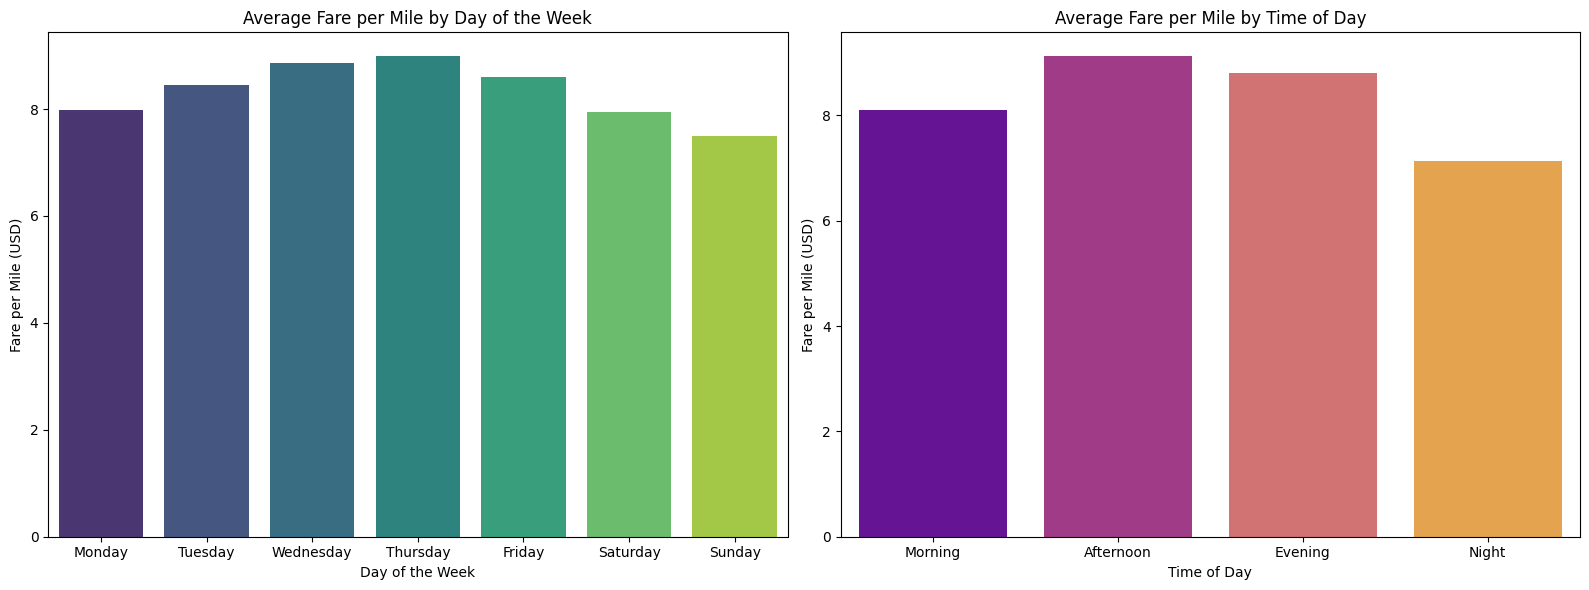

In [98]:
# Compare the average fare per mile for different days and for different times of the day


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()


def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(categorize_time_of_day)


valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)]


valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']


avg_fare_per_mile_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()


avg_fare_per_mile_by_time = valid_df.groupby('time_of_day')['fare_per_mile'].mean().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night']).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.barplot(x='day_of_week', y='fare_per_mile', data=avg_fare_per_mile_by_day, palette='viridis', ax=axes[0])
axes[0].set_title('Average Fare per Mile by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Fare per Mile (USD)')


sns.barplot(x='time_of_day', y='fare_per_mile', data=avg_fare_per_mile_by_time, palette='plasma', ax=axes[1])
axes[1].set_title('Average Fare per Mile by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Fare per Mile (USD)')

plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [100]:
# Compare fare per mile for different vendors




df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]


valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']


avg_fare_per_mile_by_vendor = valid_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=avg_fare_per_mile_by_vendor, palette='coolwarm')

plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile (USD)')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


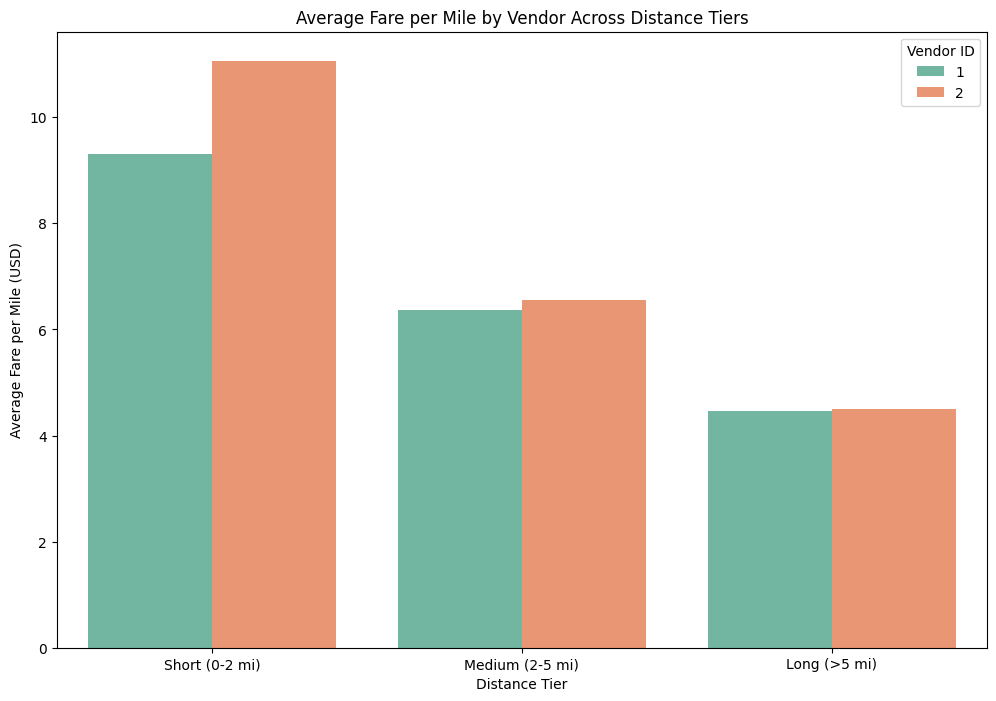

In [101]:
# Defining distance tiers



valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]


def distance_tier(distance):
    if distance <= 2:
        return 'Short (0-2 mi)'
    elif distance <= 5:
        return 'Medium (2-5 mi)'
    else:
        return 'Long (>5 mi)'


valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tier)


valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']


avg_fare_by_vendor_tier = valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


tier_order = ['Short (0-2 mi)', 'Medium (2-5 mi)', 'Long (>5 mi)']
avg_fare_by_vendor_tier['distance_tier'] = pd.Categorical(avg_fare_by_vendor_tier['distance_tier'], categories=tier_order, ordered=True)


plt.figure(figsize=(12, 8))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=avg_fare_by_vendor_tier, palette='Set2')

plt.title('Average Fare per Mile by Vendor Across Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Vendor ID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

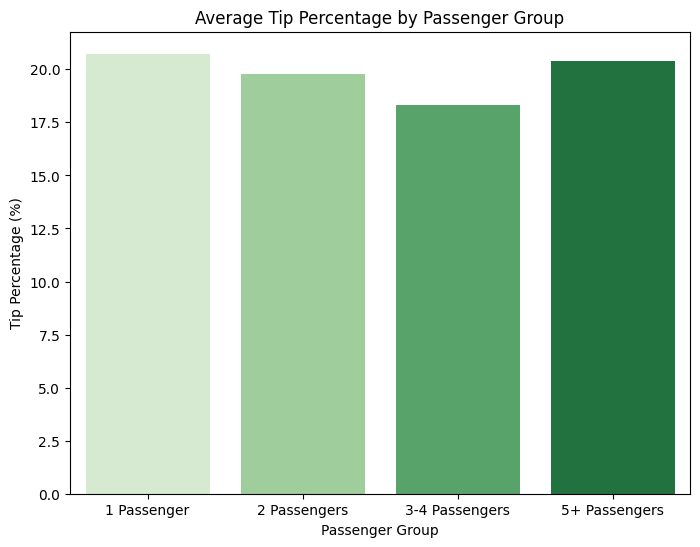

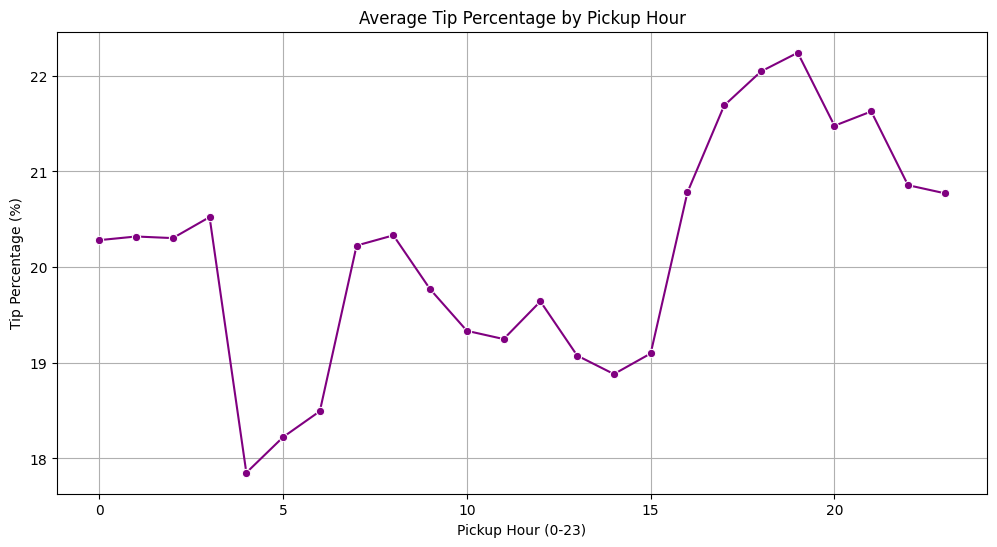

In [102]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


valid_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]


valid_df['tip_percentage'] = (valid_df['tip_amount'] / valid_df['fare_amount']) * 100

def distance_tier(distance):
    if distance <= 2:
        return 'Short (0-2 mi)'
    elif distance <= 5:
        return 'Medium (2-5 mi)'
    else:
        return 'Long (>5 mi)'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tier)


def passenger_group(count):
    if count == 1:
        return '1 Passenger'
    elif count == 2:
        return '2 Passengers'
    elif 3 <= count <= 4:
        return '3-4 Passengers'
    else:
        return '5+ Passengers'

valid_df['passenger_group'] = valid_df['passenger_count'].apply(passenger_group)


valid_df['pickup_hour'] = valid_df['tpep_pickup_datetime'].dt.hour


tip_by_distance = valid_df.groupby('distance_tier')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='distance_tier', y='tip_percentage', data=tip_by_distance, palette='Blues')
plt.title('Average Tip Percentage by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Tip Percentage (%)')
plt.show()


tip_by_passenger = valid_df.groupby('passenger_group')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='passenger_group', y='tip_percentage', data=tip_by_passenger, palette='Greens')
plt.title('Average Tip Percentage by Passenger Group')
plt.xlabel('Passenger Group')
plt.ylabel('Tip Percentage (%)')
plt.show()

tip_by_hour = valid_df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=tip_by_hour, marker='o', color='purple')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

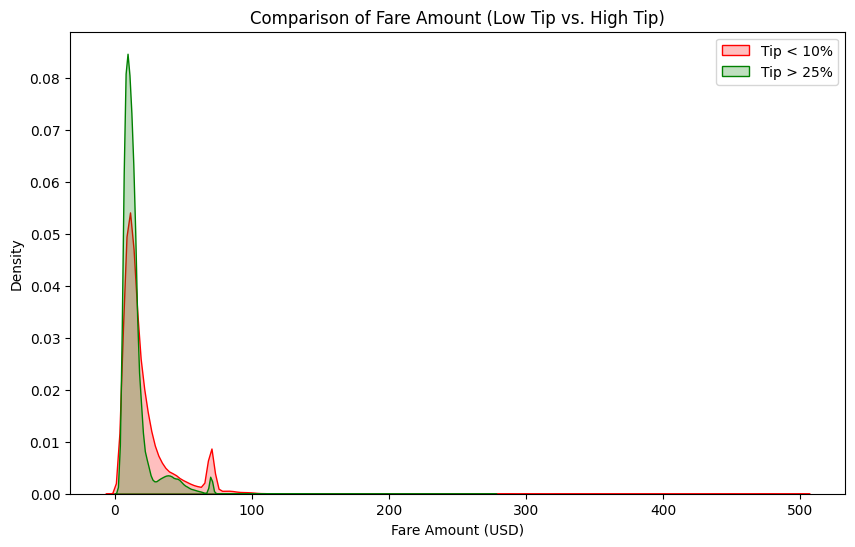

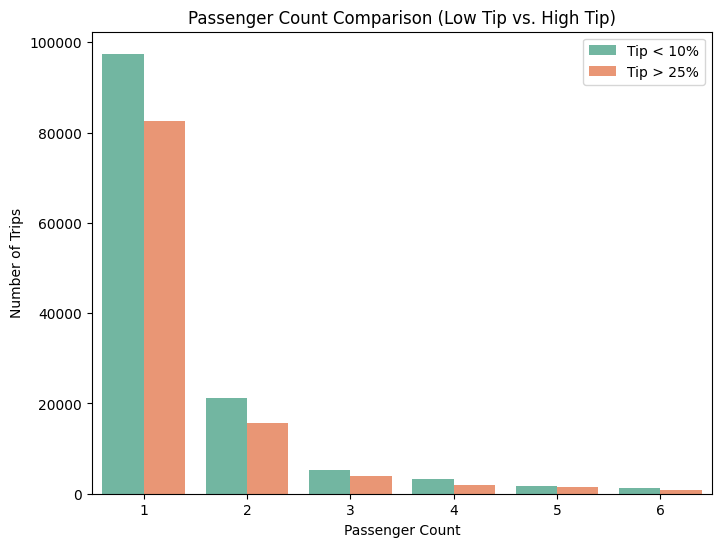

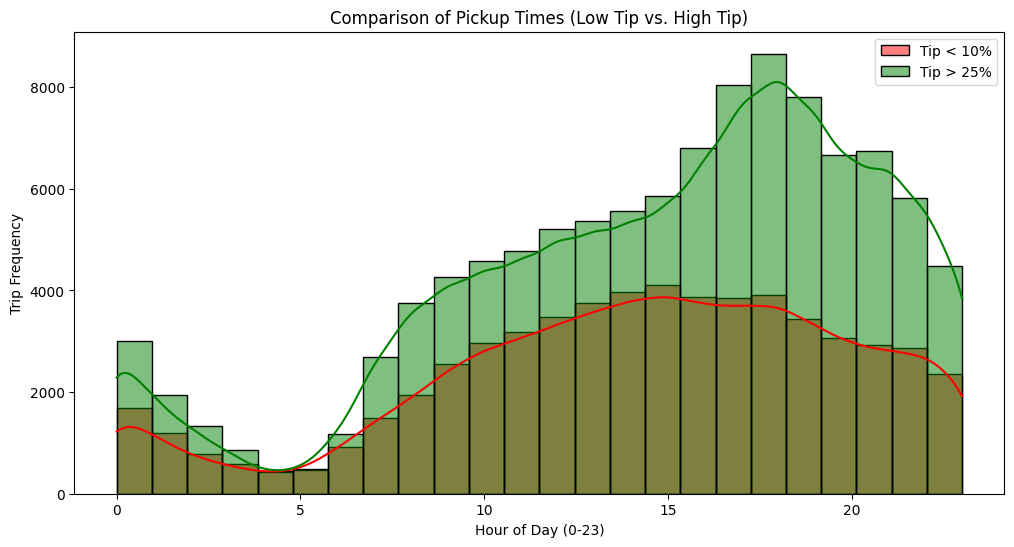

In [103]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


valid_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)]


valid_df['tip_percentage'] = (valid_df['tip_amount'] / valid_df['fare_amount']) * 100


low_tip_df = valid_df[valid_df['tip_percentage'] < 10]
high_tip_df = valid_df[valid_df['tip_percentage'] > 25]


def compare_distributions(low_df, high_df, feature, xlabel, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(low_df[feature], fill=True, color='red', label='Tip < 10%')
    sns.kdeplot(high_df[feature], fill=True, color='green', label='Tip > 25%')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


compare_distributions(low_tip_df, high_tip_df, 'trip_distance', 
                      'Trip Distance (miles)', 'Comparison of Trip Distance (Low Tip vs. High Tip)')


compare_distributions(low_tip_df, high_tip_df, 'fare_amount', 
                      'Fare Amount (USD)', 'Comparison of Fare Amount (Low Tip vs. High Tip)')


plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', hue=(valid_df['tip_percentage'] > 25), data=valid_df, palette='Set2')
plt.title('Passenger Count Comparison (Low Tip vs. High Tip)')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.legend(['Tip < 10%', 'Tip > 25%'])
plt.show()


low_tip_df['pickup_hour'] = low_tip_df['tpep_pickup_datetime'].dt.hour
high_tip_df['pickup_hour'] = high_tip_df['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(low_tip_df['pickup_hour'], kde=True, color='red', label='Tip < 10%', bins=24)
sns.histplot(high_tip_df['pickup_hour'], kde=True, color='green', label='Tip > 25%', bins=24)
plt.title('Comparison of Pickup Times (Low Tip vs. High Tip)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Trip Frequency')
plt.legend()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [106]:
# See how passenger count varies across hours and days




df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek


day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day'].map(day_map)


pivot_table = df.pivot_table(index='pickup_day_name', columns='pickup_hour', values='passenger_count', aggfunc='mean')


pivot_table = pivot_table.loc[list(day_map.values())]


plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Passenger Count by Hour and Day of the Week')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Day of the Week')
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

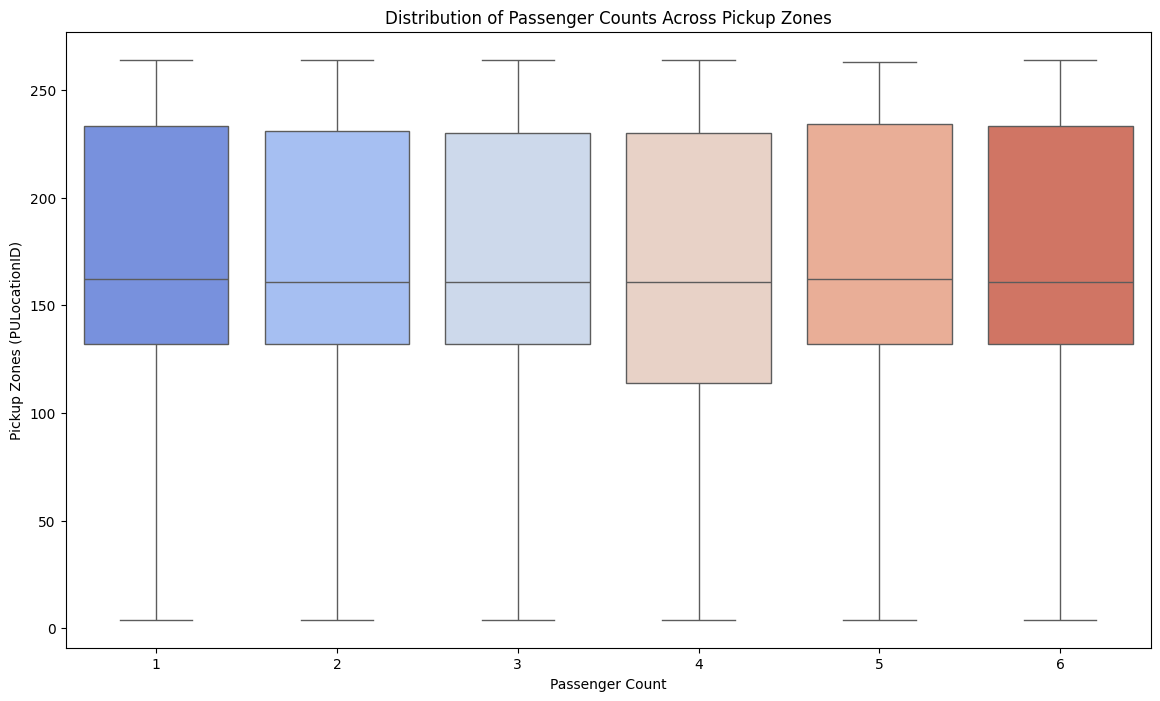

In [109]:
# How does passenger count vary across zones




zone_counts = df['PULocationID'].value_counts()
top_zones = zone_counts[zone_counts > 50].index  # Filter zones with more than 50 trips
filtered_df = df[df['PULocationID'].isin(top_zones)]


plt.figure(figsize=(14, 8))


sns.boxplot(x='passenger_count', y='PULocationID', data=filtered_df, palette='coolwarm', showfliers=False)

plt.title('Distribution of Passenger Counts Across Pickup Zones')
plt.xlabel('Passenger Count')
plt.ylabel('Pickup Zones (PULocationID)')

plt.show()



In [117]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.





Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [75]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                     'improvement_surcharge', 'congestion_surcharge', 'Combined_Airport_Fee']

surcharge_counts = (df[surcharge_columns] != 0).sum().reset_index()
surcharge_counts.columns = ['Surcharge', 'Frequency']

print(surcharge_counts)


               Surcharge  Frequency
0                  extra     146570
1                mta_tax     235047
2             tip_amount     186951
3           tolls_amount      19980
4  improvement_surcharge     236457
5   congestion_surcharge     221655
6   Combined_Airport_Fee      21824


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [125]:
optimization_strategy = """
Dynamic Dispatching:
    - Prioritize high-demand zones during peak hours (morning rush, evening, night surge).
    - Use real-time monitoring to adjust vehicle allocation.

Geofencing & Supply Management:
    - Set up geofences around busy areas (airports, business hubs).
    - Move idle vehicles to under-served regions.

Route Optimization:
    - Use algorithms for shortest, most efficient routes.
    - Minimize empty return trips by smart fleet positioning.

Driver Incentives:
    - Offer bonuses for low-demand areas and off-peak hours.
    - Reward long-distance trips to ensure broader coverage.
"""

print(optimization_strategy)



Dynamic Dispatching:
    - Prioritize high-demand zones during peak hours (morning rush, evening, night surge).
    - Use real-time monitoring to adjust vehicle allocation.

Geofencing & Supply Management:
    - Set up geofences around busy areas (airports, business hubs).
    - Move idle vehicles to under-served regions.

Route Optimization:
    - Use algorithms for shortest, most efficient routes.
    - Minimize empty return trips by smart fleet positioning.

Driver Incentives:
    - Offer bonuses for low-demand areas and off-peak hours.
    - Reward long-distance trips to ensure broader coverage.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [124]:
cab_strategy = """
Peak Hour Hotspots:
    - Morning (7 AM - 10 AM): Position cabs in residential zones for work commutes.
    - Evening (5 PM - 8 PM): Focus on business districts for return trips.

Night Demand Zones:
    - 11 PM - 3 AM: Place cabs near entertainment hubs, airports, and transport stations to capture late-night travelers.

Weekend Strategy:
    - Increase cab availability in malls, tourist spots, and event venues during weekends (especially in the afternoon and evening).

Low-Demand Redistribution:
    - Reallocate idle cabs from low-traffic areas to zones with emerging trends (e.g., newly developed regions or seasonal event areas).

Seasonal Adjustment:
    - Adjust cab supply based on monthly trends—increase near holiday destinations during vacation seasons and business hubs during work periods.

Zone-Specific Supply Balancing:
    - Ensure a balanced distribution by analyzing pickup/drop-off imbalances—position more cabs in zones with high outbound demand.
"""

print(cab_strategy)



Peak Hour Hotspots:
    - Morning (7 AM - 10 AM): Position cabs in residential zones for work commutes.
    - Evening (5 PM - 8 PM): Focus on business districts for return trips.

Night Demand Zones:
    - 11 PM - 3 AM: Place cabs near entertainment hubs, airports, and transport stations to capture late-night travelers.

Weekend Strategy:
    - Increase cab availability in malls, tourist spots, and event venues during weekends (especially in the afternoon and evening).

Low-Demand Redistribution:
    - Reallocate idle cabs from low-traffic areas to zones with emerging trends (e.g., newly developed regions or seasonal event areas).

Seasonal Adjustment:
    - Adjust cab supply based on monthly trends—increase near holiday destinations during vacation seasons and business hubs during work periods.

Zone-Specific Supply Balancing:
    - Ensure a balanced distribution by analyzing pickup/drop-off imbalances—position more cabs in zones with high outbound demand.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [123]:
pricing_strategy = """
1. Dynamic Surge Pricing:
   - Increase fares during peak hours and in high-demand zones.

2. Distance-Based Tiers:
   - Lower fares for short trips, standard for medium trips, and discounts for long trips.

3. Passenger-Based Rates:
   - Higher rates for 1-2 passengers, discounts for 3+ passengers.

4. Night & Off-Peak Discounts:
   - Offer lower fares during off-peak hours (10 PM - 6 AM) to boost demand.

5. Loyalty Programs:
   - Introduce discounts for frequent riders and subscription plans for regular commuters.

6. Competitor Matching:
   - Adjust fares based on competitor pricing to stay competitive.
"""

print(pricing_strategy)


1. Dynamic Surge Pricing:
   - Increase fares during peak hours and in high-demand zones.

2. Distance-Based Tiers:
   - Lower fares for short trips, standard for medium trips, and discounts for long trips.

3. Passenger-Based Rates:
   - Higher rates for 1-2 passengers, discounts for 3+ passengers.

4. Night & Off-Peak Discounts:
   - Offer lower fares during off-peak hours (10 PM - 6 AM) to boost demand.

5. Loyalty Programs:
   - Introduce discounts for frequent riders and subscription plans for regular commuters.

6. Competitor Matching:
   - Adjust fares based on competitor pricing to stay competitive.

